SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues etc. The potential customers are travellers who want to insure themselves against travel-related risks. They have different product offerings like 1-way travel insurance, 2-way insurance, insurance against cancellations and so on. They receive thousands of claims spread across different products.

Wrongly denying a genuine claim could lead to lawsuits against the company and approving the wrong claim would lead to a loss. Automatically predicting the claims could lead to a lot of benefits and solve some other supplementary problems too. As a team of data scientists consulting for SafeTravel Inc, you are now responsible for meeting their business outcomes. 

## Problem Description

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

## Dataset Description

A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

   - Target: Claim Status (Claim)
   - Name of agency (Agency)
   - Type of travel insurance agencies (Agency.Type)
   - Distribution channel of travel insurance agencies (Distribution.Channel)
   - Name of the travel insurance products (Product.Name)
   - Duration of travel (Duration)
   - Destination of travel (Destination)
   - Amount of sales of travel insurance policies (Net.Sales)
   - The commission received for travel insurance agency (Commission)
   - Age of insured (Age)
   - The identification record of every observation (ID)


### EDA

1. Product name with No claims sanctioned
2. Product name with claims sanctioned
3. Do claim percentage depends on agency type
4. Claim percentage on product name
5. Does the duration of the trip have an impact on claims acceptance


## Evaluation Metric

The evaluation metric for this task will be `precision_score`. Read up about it more [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

### Submission Format

The user has to submit a csv file with the ID and Claim label. Sample submission file has been given to you. You can refer the sample submission file.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
import scipy.stats as ss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv')
df

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.0000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.0000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.8800,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.0000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.0000,36,0
...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0


In [2]:
#Adding new column Commision Percentage
df["CommPercent"] = (df["Commision (in value)"] / df["Net Sales"] )*100

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
 11  CommPercent           51921 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.8+ MB


### Average Commission drawn by the agencies.

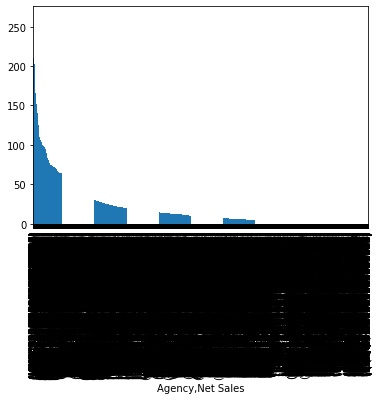

In [4]:
#df.groupby("Agency")["Commision (in value)"].mean().sort_values(ascending = False).plot(kind = "bar")
df.groupby(["Agency","Net Sales"])["Commision (in value)"].mean().sort_values(ascending = False).plot(kind = "bar")

#### Insight :
#### Recommendation :

In [5]:
df.groupby("Agency")["CommPercent"].max().sort_values(ascending = False)

Agency
TST          inf
SSI          inf
RAB          inf
LWC          inf
KML          inf
JZI          inf
JWT          inf
CWT          inf
CCR          inf
CBH          inf
C2B          inf
ART          inf
ADM          inf
EPX    65.000000
CSR    33.000000
TTW    23.815444
Name: CommPercent, dtype: float64

### Which is frequently  bought travel product?

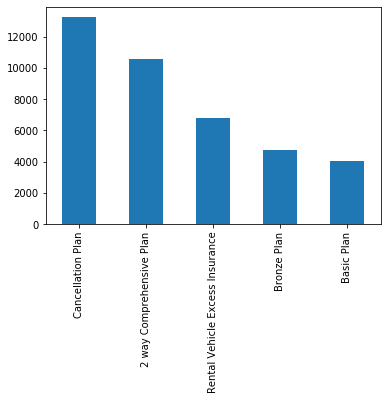

In [6]:
df["Product Name"].value_counts().iloc[:5].plot(kind="bar")

### Relation between Product name-(Cancellation Plan) and Destination. Claim Status

In [7]:
df.groupby(["Product Name","Destination"])

In [8]:
#df.loc[df['Agency'] =='EPX'].tail(50) 

NameError: name 'table2' is not defined

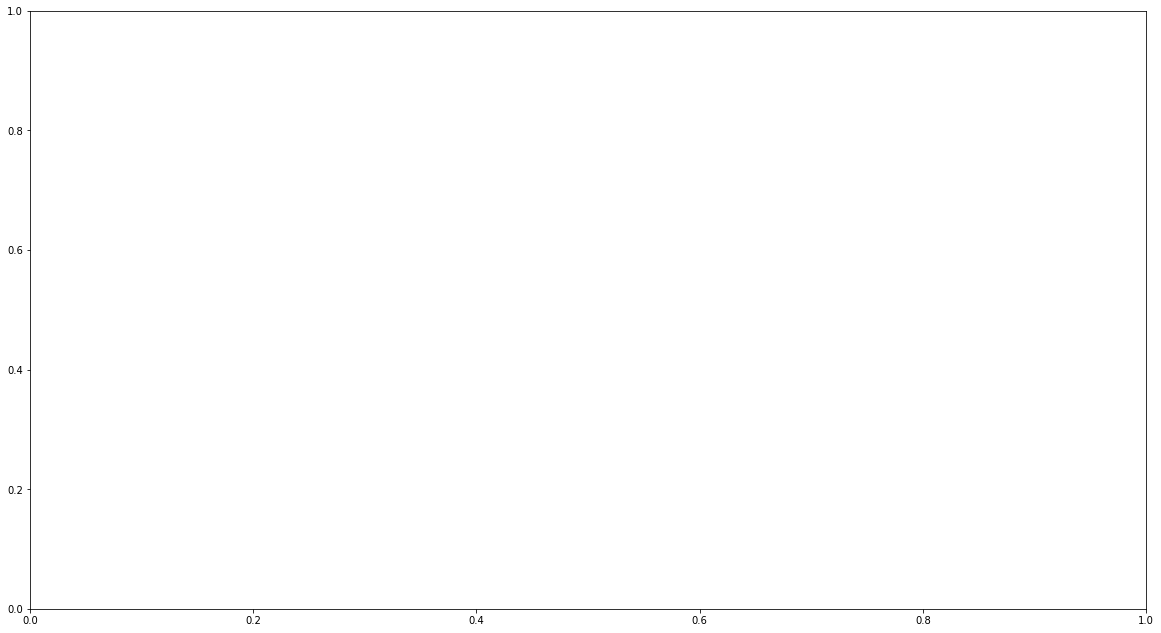

In [9]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table2.index,table2[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)

In [ ]:
df.head()

In [ ]:
sns.boxplot(x = 'Duration', data = df)

In [ ]:
plt.figure(figsize=(10,7))
df.boxplot() 
plt.show()

Insights = Outliers detected in duration column

## Does claim percentage depends upon Agency type?

In [ ]:
table1=pd.crosstab(df['Agency'],df['Claim'],margins=True)

table1.drop(index=['All'],inplace=True)
table1=(table1.div(table1['All'],axis=0))*100

table1['mean commision']=df.groupby('Agency')['Commision (in value)'].mean()
table1

In [ ]:
fig,ax1=plt.subplots(figsize=(18,9))
sns.barplot(table1.index,table1[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3);

**X axis= Agency Name
Y axis=Acceptance %
line plot= Commision
So we can see certain agencies have higher % of acceptance, C2B, LWC, TTW**

## Claim percentage depends on product name

In [ ]:
table2=pd.crosstab(df['Product Name'],df['Claim'],margins=True)
table2=(table2.div(table2['All'],axis=0))*100

table2['mean commision']=df.groupby('Product Name')['Commision (in value)'].mean()
table2.drop(index=['All'],inplace=True)
table2

In [ ]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table2.index,table2[1],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)

## Does the duration of the trip have an impact on claims acceptance

In [ ]:
df['Duration_label']=pd.qcut(df['Duration'],q=25)
table3=pd.crosstab(df['Duration_label'],df['Claim'],normalize='index')
table3

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(table3.index,table3[1])
plt.ylabel('Claims Accepted')
plt.xticks(rotation=90);

On varying the value of bins, we found that Durations > 178 have a high percentage of acceptance compared to the rest.

In [ ]:
df[df['Product Name'] == 'Ticket Protector']

In [ ]:
df[df['Duration'] > 422]

In [ ]:
df['Destination'].value_counts()

In [25]:
df['Destination'].describe()

count    52310.000000
mean        56.760658
std         27.169432
min          0.000000
25%         37.000000
50%         68.000000
75%         75.000000
max         96.000000
Name: Destination, dtype: float64

In [26]:
df['Duration'].describe()

count    52310.000000
mean        57.485395
std         83.040676
min          0.000000
25%         12.000000
50%         26.000000
75%         59.000000
max        438.000000
Name: Duration, dtype: float64

In [27]:
df.groupby(['Agency','Product Name'])['Agency Type'].value_counts()

Agency  Product Name  Agency Type
0       15            1                 30
        24            1                 26
1       2             0                165
        24            0                 58
2       3             0                295
        4             0               2348
        9             0               4723
        13            0                380
        17            0               2862
        24            0                  7
3       12            1                 75
        15            1                  1
4       12            1                145
        15            1                 11
5       12            1                 58
        15            1                  2
6       16            1               6813
7       0             1               2409
        1             1              10555
        10            1              13254
8       24            0                550
9       8             0               4042
        15          

In [28]:
df.groupby(['Agency Type'])['Product Name'].value_counts()

Agency Type  Product Name
0            9                4723
             8                4042
             17               2862
             4                2348
             24               1715
             22                780
             13                380
             3                 295
             2                 165
             15                  4
1            10              13254
             1               10555
             16               6813
             0                2409
             23                394
             12                278
             18                251
             24                246
             5                 183
             15                137
             20                130
             19                100
             7                  92
             14                 84
             6                  50
             21                 12
             11                  8
Name: Product Name, dtype: in

In [29]:
df.groupby(['Agency','Agency Type'])['Product Name'].value_counts()

Agency  Agency Type  Product Name
0       1            15                 30
                     24                 26
1       0            2                 165
                     24                 58
2       0            9                4723
                     17               2862
                     4                2348
                     13                380
                     3                 295
                     24                  7
3       1            12                 75
                     15                  1
4       1            12                145
                     15                 11
5       1            12                 58
                     15                  2
6       1            16               6813
7       1            10              13254
                     1               10555
                     0                2409
8       0            24                550
9       0            8                4042
                    

In [30]:
df.groupby(['Agency'])['Product Name'].value_counts()

Agency  Product Name
0       15                 30
        24                 26
1       2                 165
        24                 58
2       9                4723
        17               2862
        4                2348
        13                380
        3                 295
        24                  7
3       12                 75
        15                  1
4       12                145
        15                 11
5       12                 58
        15                  2
6       16               6813
7       10              13254
        1               10555
        0                2409
8       24                550
9       8                4042
        24                573
        15                  4
10      24                220
        15                 93
11      18                251
        5                 183
        20                130
        19                100
        7                  92
        6                  50
12      24         

In [31]:
df[df['Product Name'] == 'Cancellation Plan']

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,CommPercent


In [33]:
df['Product Name'].value_counts()

10    13254
1     10555
16     6813
9      4723
8      4042
17     2862
0      2409
4      2348
24     1961
22      780
23      394
13      380
3       295
12      278
18      251
5       183
2       165
15      141
20      130
19      100
7        92
14       84
6        50
21       12
11        8
Name: Product Name, dtype: int64

In [34]:
df1 = df[df["Claim"]==1]
df0 = df[df['Claim']==0]
df1

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,CommPercent
8,1016,7,1,1,1,15,16,48.662699,0.000000,35,1,0.000000
9,6050,2,0,1,9,12,75,23.258824,5.817294,27,1,25.011128
10,1593,7,1,1,1,85,16,66.823793,0.000000,35,1,0.000000
11,6191,2,0,1,17,24,75,82.550000,20.640000,30,1,25.003028
14,165,2,0,1,9,19,75,58.211644,14.552911,65,1,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
52272,2616,2,0,1,17,13,75,29.827737,7.461934,53,1,25.016763
52277,2518,7,1,1,1,222,61,43.014746,0.000000,35,1,0.000000
52286,2592,2,0,1,9,22,75,20.621051,5.159051,27,1,25.018368
52288,6188,2,0,1,17,15,75,53.484565,13.376141,24,1,25.009348


In [35]:
df1.groupby("Product Name")["Claim"].count().sort_values(ascending = False)

Product Name
9     2020
1     1457
4     1451
17    1384
16     848
10     355
8      246
3      172
13     143
18     121
5      120
24      94
0       68
22      57
19      50
14      37
7       31
23      21
20      16
6       14
12      12
15       2
21       1
Name: Claim, dtype: int64

## Product name with claims sanctioned

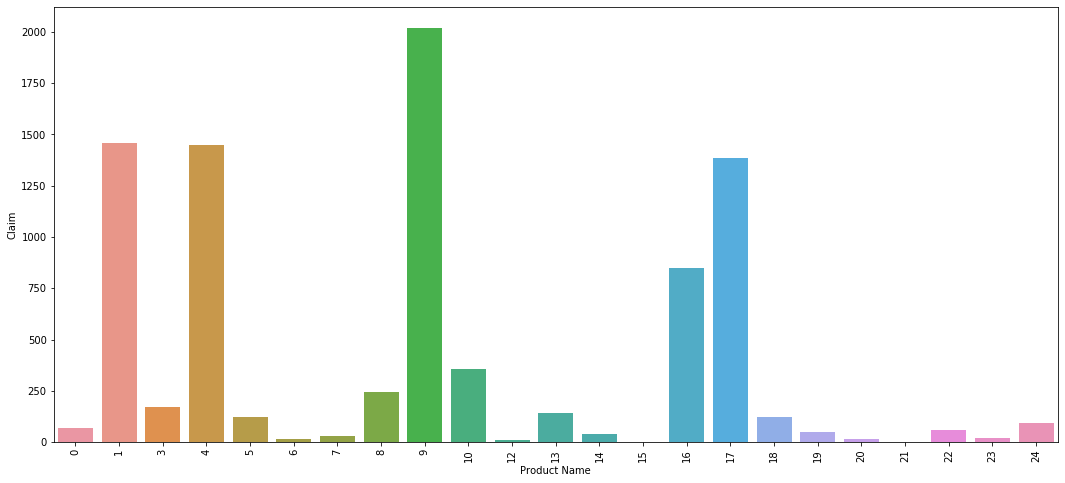

In [36]:
claim_sanctioned = df1.groupby("Product Name")["Claim"].count().sort_values(ascending = False)
plt.figure(figsize = (18,8))
sns.barplot(claim_sanctioned.index, claim_sanctioned)
plt.xticks(rotation = 90);

## Product name with No claims sanctioned

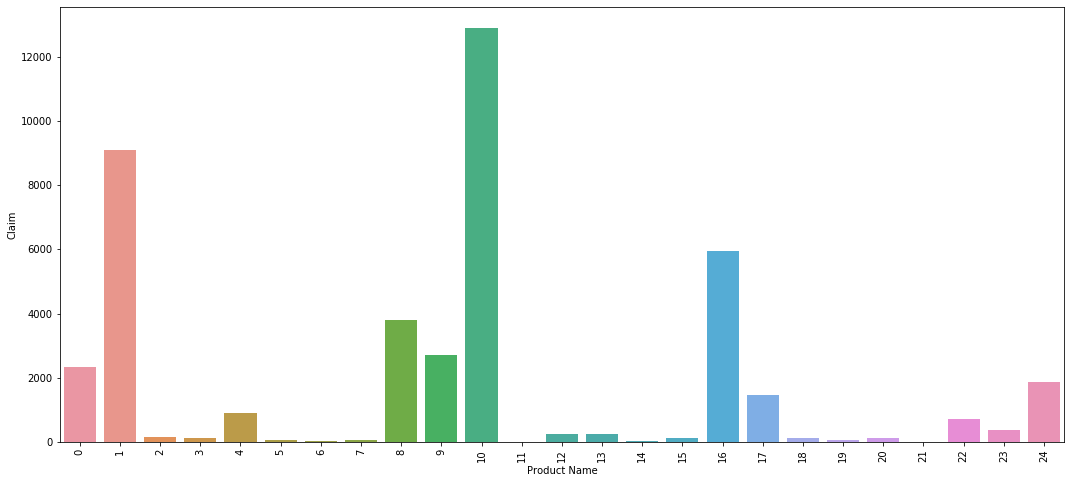

In [37]:
claim_rejected = df0.groupby("Product Name")["Claim"].count().sort_values(ascending = False)
plt.figure(figsize = (18,8))
sns.barplot(claim_rejected.index, claim_rejected)
plt.xticks(rotation = 90);

In [38]:
# covert all catogorical data into numeric data
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
# scaled the data
from sklearn.preprocessing import StandardScaler

x = df.drop('Claim',axis=1) # feature data set
print(x)
print(type(x))
y=df['Claim']

#x =  StandardScaler().fit_transform(x)


         ID  Agency  Agency Type  Distribution Channel  Product Name  \
0        10       7            1                     1            10   
1      2242       7            1                     1            10   
2      7244       6            1                     1            16   
3      2751       7            1                     1             1   
4      6834       7            1                     1             1   
...     ...     ...          ...                   ...           ...   
52305  3367       2            0                     1             3   
52306  3279      12            0                     1            24   
52307  5079       2            0                     1             9   
52308  6519       7            1                     1            10   
52309  2788       2            0                     1             4   

       Duration  Destination   Net Sales  Commision (in value)  Age  \
0            63           68   12.000000                0.0000  

In [41]:
# split the data into (80%)train and (20%)test
from sklearn.model_selection import train_test_split

x_train ,x_test ,y_train, y_test = train_test_split(x , y ,test_size =0.2, random_state=42)
print(y_train)

12044    0
32928    1
46083    0
51064    0
25127    0
        ..
11284    0
44732    1
38158    0
860      0
15795    0
Name: Claim, Length: 41848, dtype: int64


In [42]:
# Spot Check Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='precision')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: nan (nan)
XGB: 0.829447 (0.015130)
ADA: nan (nan)
RF: nan (nan)


In [44]:
from sklearn.metrics import confusion_matrix
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred= model_lr.predict(x_test)
confusion_matrix(y_test,y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

In [19]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

NameError: name 'y_pred' is not defined

In [20]:
from sklearn.metrics import precision_score,accuracy_score

precision_score(y_test, y_pred,average='weighted')

NameError: name 'y_pred' is not defined

In [21]:
from sklearn.metrics import precision_score,accuracy_score

precision_score(y_test, y_pred,average='micro')

NameError: name 'y_pred' is not defined

In [22]:
from sklearn.metrics import precision_score,accuracy_score

precision_score(y_test, y_pred,average='macro')

NameError: name 'y_pred' is not defined

In [23]:
from sklearn.metrics import confusion_matrix
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred= xg.predict(x_test)
confusion_matrix(y_test,y_pred)

from sklearn.metrics import precision_score,accuracy_score
precision_score(y_test, y_pred,average='weighted')

0.9266286746064574

In [24]:
from sklearn.metrics import confusion_matrix
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred= ad.predict(x_test)
confusion_matrix(y_test,y_pred)

from sklearn.metrics import precision_score,accuracy_score
precision_score(y_test, y_pred,average='weighted')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
confusion_matrix(y_test,y_pred)

from sklearn.metrics import precision_score,accuracy_score
precision_score(y_test, y_pred,average='weighted')

In [ ]:
test = pd.read_csv('test.csv')
test.head()
id_ = test['ID']

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in test.columns:
  if test[column].dtype == np.number:
    continue
  test[column] = LabelEncoder().fit_transform(test[column])

# scaled the data
from sklearn.preprocessing import StandardScaler

# x = test.drop('Claim',axis=1) # feature data set
# print(x)
# y=df['Claim']

#test =  StandardScaler().transform(test)

In [ ]:
# test = test[['Id','age','sex','bmi','children','smoker','region','charges']]
# Code starts here
# Applying same transformation on test
# test.drop('Id',axis=1,inplace=True)
id_ = test['ID']
# Predict on the test data
y_pred_test4 = rf.predict(test)

print(y_pred_test4)

# Create a sample submission file
sample_submission = pd.DataFrame({'ID':id_,'Claim':y_pred_test4})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sub_1.csv',index=False)

# Code ends here

In [ ]:
precision_score(test, y_pred_test4)